# Lab 8/ Spotify data set 🤢🤢🤢

Minakov Nikita, csse 1707DA

@minakov.nv

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats

import brfss

In [2]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')

In [3]:
db_read

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [17]:
popul = db_read.popularity
popul_sample = db_read.popularity.sample(100)

Here's the "distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

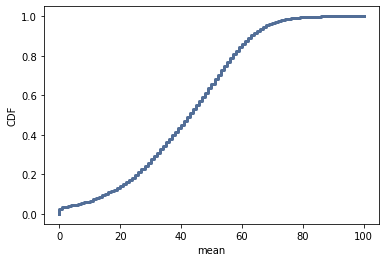

In [12]:
cdf = thinkstats2.Cdf(popul)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='mean',
                 ylabel='CDF')

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

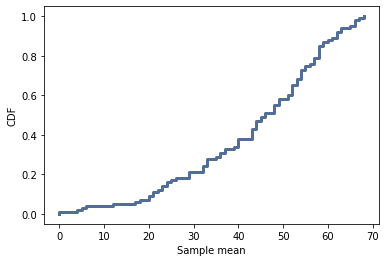

In [18]:
cdf = thinkstats2.Cdf(popul_sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

Mean of all data in Set

In [22]:
np.mean(popul)

41.12750241701579

The mean of the sample means is close to the actual value of $\mu$.

In [23]:
np.mean(popul_sample)

43.43

Both means are preaty close but have little bias.

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [24]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(12, 65)

And the RMSE of the sample means is called the standard error.

In [25]:
stderr = RMSE(popul, 90)
stderr

52.14780715384867

In [26]:
stderr = RMSE(popul_sample, 90)
stderr

49.182618881064066

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [28]:
def Estimate4(n=7, iters=100000):

    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('xbar', MeanError(means, mu))
    print('median', MeanError(medians, mu))
    
Estimate4()

xbar -0.0007902046076197237
median 0.0003098119649461412


In [29]:
def Estimate5(n=7, iters=100000):

    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

RMSE biased 0.5140185943438927
RMSE unbiased 0.5758682096172361


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.778677707728786
confidence interval (1.2697412218109843, 3.672632974559394)


0.778677707728786

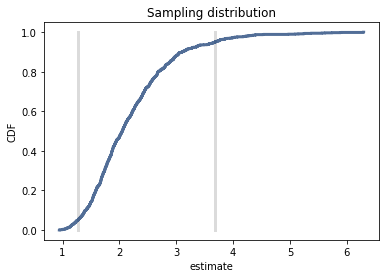

In [30]:
def SimulateSample(lam=2, n=10, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [31]:
def SimulateGame(lam):

    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    L = goals
    return L

rmse L 1.4154165464625599
mean error L 0.000132


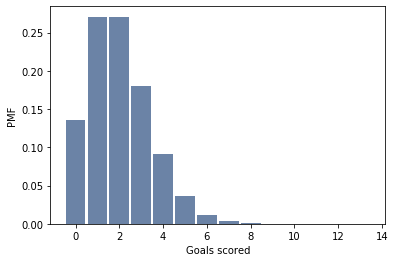

In [33]:
def Estimate6(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    
Estimate6()